# Final Report 
## Applied Python Course - IHMT - 8-12 May 2023
Francisco Merca (a21002072@ihmt.unl.pt) <br>
Rebecca Pabst (a21002014@ihmt.unl.pt)

---
#**Assessment of the number of whole genomes sequences of ZIKV registered in Genbank**

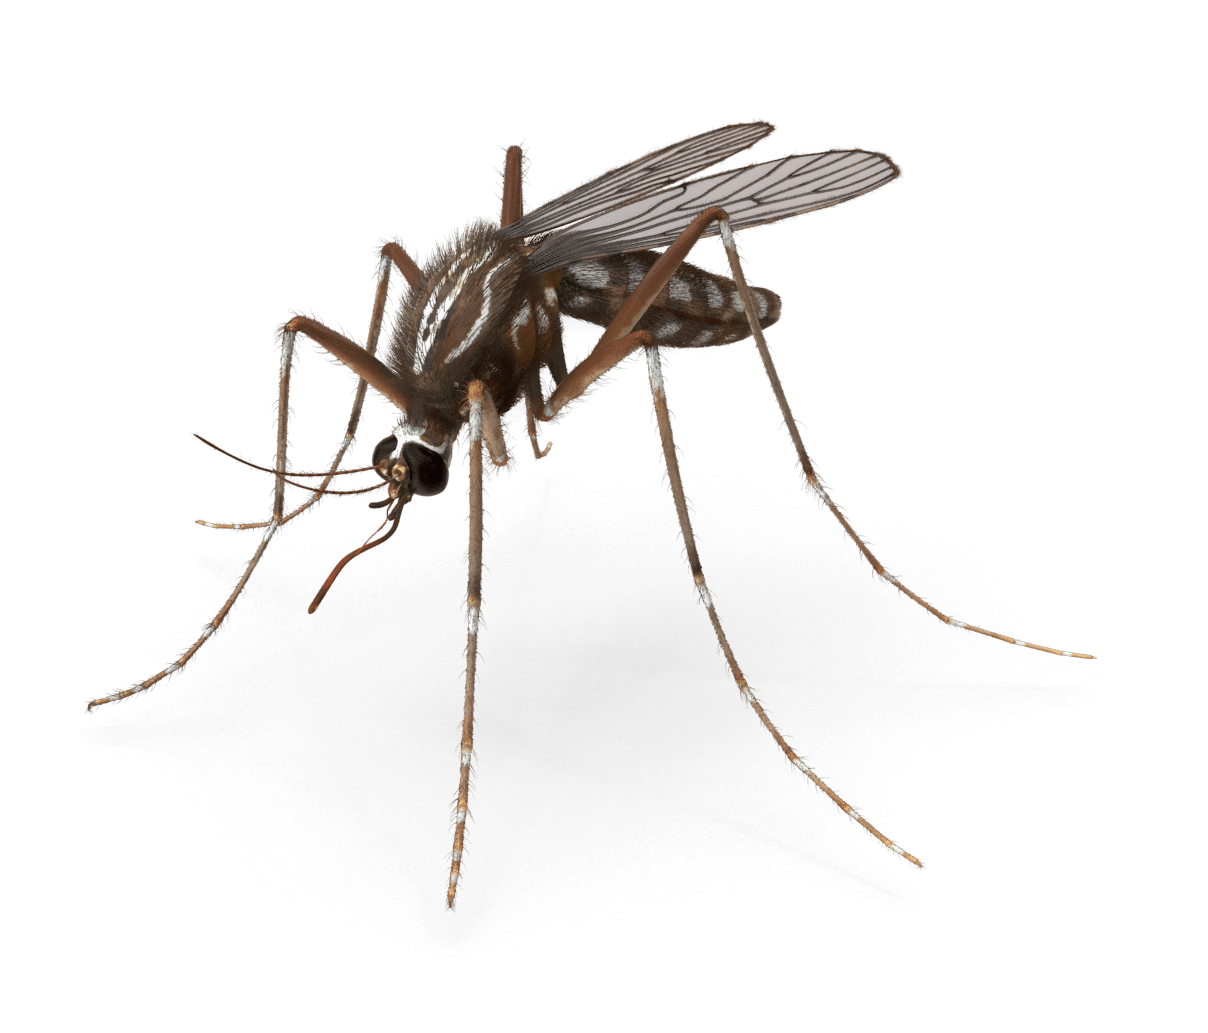


#Objectives
####The main objective of this project is to show the number of Zika Virus (ZIKV) whole genome sequences registered on genbank on a temporal and a spatial scale, by presenting tables and visual graphs of the genbank entries;

---
#Workflow
The workflow was divided into the following steps:
<body>

  <ol>
    <li>Retrieve ZIKV whole genome sequences from genebank</li>
    <li>Create and filter data</li>
        <li>Keep only the entries that have information on the location (country) and time (year)</li>
    <li>Transofrm data as a dataframe with panda to be manageable</li>
    <li>Present the number of whole genome sequences per country
      <ol>
        <li>Analayse the temporal occurrence (per year)</li>
        <li>Analayse the spatial occurrence (per country)</li>
      </ol>

</body>
</html>

---
 




First we created a connection to a shared folder in google drive to access files we want to work with.

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Bio import SeqIO
import re 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Open the file that was downloaded directly from genbank, with all whole genome sequences of ZIKV

In [ ]:
count = 0
with open("/content/drive/MyDrive/Python-IHMT-Mai2023-pub/IHMT_Python_Exam/sequence.gb") as handle:
    for gb_record in SeqIO.parse(handle, "genbank"):
        print(gb_record)
        count += 1
        if count == 1:
            break

ID: KX087102.2
Name: KX087102
Description: Zika virus strain ZIKV/Homo sapiens/COL/FLR/2015, complete genome
Database cross-references: BioProject:PRJNA314889
Number of features: 16
/molecule_type=ss-RNA
/topology=linear
/data_file_division=VRL
/date=18-NOV-2016
/accessions=['KX087102']
/sequence_version=2
/keywords=['']
/source=Zika virus
/organism=Zika virus
/taxonomy=['Viruses', 'Riboviria', 'Orthornavirae', 'Kitrinoviricota', 'Flasuviricetes', 'Amarillovirales', 'Flaviviridae', 'Flavivirus']
/references=[Reference(title='Direct Submission', ...), Reference(title='Direct Submission', ...)]
/comment=On Nov 18, 2016 this sequence version replaced KX087102.1.
This work was supported by the National Institute of Allergy and
Infectious Diseases (NIAID), Genome Center for Infectious Diseases
(GCID) program.
/structured_comment=defaultdict(<class 'dict'>, {'Genome-Assembly-Data': {'Current Finishing Status': 'Finished', 'Assembly Method': 'clc_ref_assemble_long v. 3.22.55705', 'Genome Cove

In [ ]:
gb_dict = SeqIO.to_dict(SeqIO.parse("/content/drive/MyDrive/Python-IHMT-Mai2023-pub/IHMT_Python_Exam/sequence.gb","genbank"))

/usr/local/lib/python3.10/dist-packages/Bio/GenBank/Scanner.py:1791: BiopythonParserWarning: Structured comment not parsed for KU365780. Is it malformed?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/GenBank/Scanner.py:1791: BiopythonParserWarning: Structured comment not parsed for KU365779. Is it malformed?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/GenBank/Scanner.py:1791: BiopythonParserWarning: Structured comment not parsed for KU365778. Is it malformed?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/GenBank/Scanner.py:1791: BiopythonParserWarning: Structured comment not parsed for KU365777. Is it malformed?
  warnings.warn(


Check the data

In [ ]:
print(f"There are {len(gb_dict)} entries for ZIKV on Genebank")
for r in gb_dict:
  for a in gb_dict[r].annotations:
    print(a)

Streaming output truncated to the last 5000 lines.
keywords
source
organism
taxonomy
references
structured_comment
molecule_type
topology
data_file_division
date
accessions
sequence_version
keywords
source
organism
taxonomy
references
structured_comment
molecule_type
topology
data_file_division
date
accessions
sequence_version
keywords
source
organism
taxonomy
references
structured_comment
molecule_type
topology
data_file_division
date
accessions
sequence_version
keywords
source
organism
taxonomy
references
structured_comment
molecule_type
topology
data_file_division
date
accessions
sequence_version
keywords
source
organism
taxonomy
references
structured_comment
molecule_type
topology
data_file_division
date
accessions
sequence_version
keywords
source
organism
taxonomy
references
structured_comment
molecule_type
topology
data_file_division
date
accessions
sequence_version
keywords
source
organism
taxonomy
references
structured_comment
molecule_type
topology
data_file_division
date
acce

In [ ]:
count = 0
for r in gb_dict:
  #print ID to know which sequence we are looking at
  print(gb_dict[r].id)
  #print length of sequence
  print(len(gb_dict[r].seq))
  #stop after number of prints
  count += 1
  if count == 3:
    break

KX087102.2
10790
KX087101.3
10778
MH916806.1
10658


In [ ]:
count = 0 
print(f"There are {len(gb_dict[r].annotations['molecule_type'])} different molecular types in this library.")
for r in gb_dict:
  print(gb_dict[r].annotations["molecule_type"])
  count += 1
  if count == 20:
    break

There are 4 different molecular types in this library.
ss-RNA
ss-RNA
ss-RNA
ss-RNA
ss-RNA
ss-RNA
ss-RNA
ss-RNA
ss-RNA
ss-RNA
ss-RNA
ss-RNA
ss-RNA
ss-RNA
ss-RNA
ss-RNA
ss-RNA
ss-RNA
ss-RNA
ss-RNA


Visual check of the qualifiers in the dictionary

In [ ]:
for r in gb_dict:
  for f in gb_dict[r].features:
    # print only sequences for which there are entries for country and collection date 
    if f.type == "source":
      if "country" in f.qualifiers:
        if "collection_date" in f.qualifiers:
          print(gb_dict[r].id)
          print(f.qualifiers)

KX087102.2
{'organism': ['Zika virus'], 'mol_type': ['genomic RNA'], 'strain': ['ZIKV/Homo sapiens/COL/FLR/2015'], 'isolate': ['C1/C2'], 'host': ['Homo sapiens'], 'db_xref': ['BEI:NR-50183', 'taxon:64320'], 'lab_host': ['Aedes albopictus cells'], 'country': ['Colombia: Barranquilla'], 'collection_date': ['Dec-2015'], 'note': ['passage details: C1/C2 (Baylor College of Medicine/BEI); C# = number of passages in C6/36 cells']}
KX087101.3
{'organism': ['Zika virus'], 'mol_type': ['genomic RNA'], 'strain': ['ZIKV/Homo sapiens/PRI/PRVABC59/2015'], 'isolate': ['V3/V2'], 'host': ['Homo sapiens'], 'db_xref': ['BEI:NR-50240', 'taxon:64320'], 'lab_host': ['Cercopithecus aethiops kidney epithelial cells'], 'country': ['Puerto Rico'], 'collection_date': ['Dec-2015'], 'note': ['passage details: V3/V2 (CDC/BEI); V# = number of passages in Vero cells']}
MH157213.1
{'organism': ['Zika virus'], 'mol_type': ['genomic RNA'], 'strain': ['ZIKV/Homo sapiens/MEX/41-001-F_V3_O/2016'], 'host': ['Homo sapiens'],

Creation of a new dictionary from the Genebank gb file. <br>However, some entries in the genebank lack values for the "country" or "collection_date" fields. Here's how we handle this:

1. We check each entry to determine if it contains values for these qualifiers.
2. For the "country" field, we extract the country name by splitting the values using a separator and retaining only the country name.
3. To extract the year from the "collection_date" field, we utilize the "re" library and select only the four consecutive numbers between 0 and 9.
4. Finally, we store these values, along with the Source ID, in our newly created dictionary.

In [ ]:
# Initialize new dictionary
dict_zika = {}

# Access wanted entries from existing dictionary
for r in gb_dict:
  for f in gb_dict[r].features:
    if f.type == "source":
      if "country" in f.qualifiers and "collection_date" in f.qualifiers:
        # split country by ":"
        location = f.qualifiers['country'][0]
        country = location.split(":")[0]
        # select only year of record by using regular expressions with re library
        date = f.qualifiers['collection_date'][0]
        p = re.compile("[0-9][0-9][0-9][0-9]")
        year = p.findall(date)[0]
        #print(year)
        
        # Add entries to "dict_zika"
        dict_zika[gb_dict[r].id]=[country, year]

print(dict_zika)

print(f"After eliminating sequences without entries for country and or date from originally {len(gb_dict)} entries, there were {len(dict_zika)} sequences left for the analysis.")

{'KX087102.2': ['Colombia', '2015'], 'KX087101.3': ['Puerto Rico', '2015'], 'MH157213.1': ['Mexico', '2016'], 'MH157208.1': ['Mexico', '2016'], 'MH157202.1': ['Mexico', '2016'], 'KX879604.1': ['Ecuador', '2016'], 'KX879603.1': ['Ecuador', '2016'], 'KY648934.1': ['Mexico', '2016'], 'KY765327.1': ['Nicaragua', '2016'], 'KY765326.1': ['Nicaragua', '2016'], 'KY765325.1': ['Nicaragua', '2016'], 'KY765324.1': ['Nicaragua', '2016'], 'KY765323.1': ['Nicaragua', '2016'], 'KY765322.1': ['Nicaragua', '2016'], 'KY765321.1': ['Nicaragua', '2016'], 'KY765320.1': ['Nicaragua', '2016'], 'KY765318.1': ['Nicaragua', '2016'], 'KY765317.1': ['Nicaragua', '2016'], 'KX601166.2': ['Senegal', '1984'], 'KX694534.2': ['Honduras', '2015'], 'KX694533.2': ['Malaysia', '1966'], 'KX694532.2': ['Thailand', '2013'], 'KX446951.2': ['Mexico', '2016'], 'KX446950.2': ['Mexico', '2016'], 'KX198135.2': ['Panama', '2016'], 'KX198134.2': ['Senegal', '1984'], 'KX156776.2': ['Panama', '2015'], 'KX156775.2': ['Panama', '2015'], 

In this step we transform our dictionary into a data frame format to be more easily to work with

In [ ]:
# list of column names
colnames = ['country','year']

#create data frame from dictionary
df = pd.DataFrame.from_dict(dict_zika)

#transpose x and y 
df1 = df.transpose()

# add column names
df1.columns = colnames
df1.head()

                country  year
KX087102.2     Colombia  2015
KX087101.3  Puerto Rico  2015
MH157213.1       Mexico  2016
MH157208.1       Mexico  2016
MH157202.1       Mexico  2016
...                 ...   ...
KU365780.1       Brazil  2015
KU365779.1       Brazil  2015
KU365778.1       Brazil  2015
KU365777.1       Brazil  2015
KU312312.1     Suriname  2015

[551 rows x 2 columns]


The next step is to count the number of genbank entries in the same countries.

In [ ]:
# create new data frame and call the column with number of occurrences per country 'count'
countrycount = pd.DataFrame(df1.groupby('country').size(), columns=["count"])
countrycount = countrycount.reset_index()

countrycount.head()

,country,count
0,Argentina,1
1,Australia,1
2,Brazil,71
3,Cambodia,3
4,Canada,4


To better assess the data previously described, we created a simple bar graph with all whole genome sequences registered per country.

<Axes: xlabel='count', ylabel='country'>

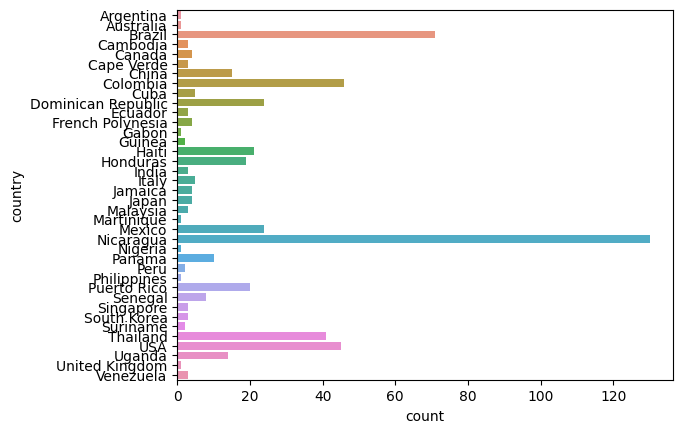

In [ ]:
sns.barplot(y=countrycount['country'], x=countrycount['count'])

To assess the differences between countries, we transform the previous chart so that the country with the most country counts is at the top and the country with the fewest counts is at the bottom.

<Axes: xlabel='count', ylabel='country'>

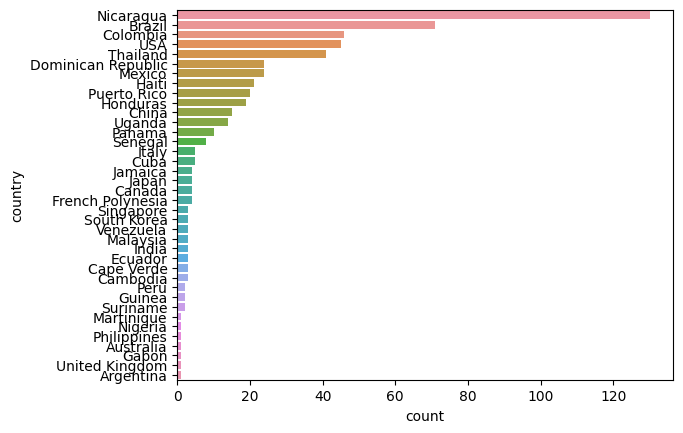

In [ ]:
sorted_df = countrycount.sort_values('count', ascending=False)

# Create the bar plot
sns.barplot(y=sorted_df['country'], x=sorted_df['count'])

The same approach was used for evaluate the progression throughout the years to assess the evaluation of ZIKV

In [ ]:
yearcount = pd.DataFrame(df1.groupby('year').size(), columns=["count"])
yearcount = yearcount.reset_index()

yearcount.head()

,year,count
0,1947,12
1,1962,1
2,1966,3
3,1968,1
4,1984,8


The following line graph represents the genebank entry of ZIKV since the first identification till today


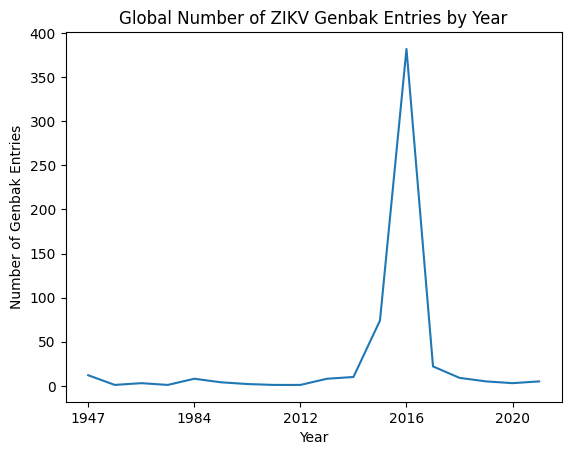

In [ ]:
sns.lineplot(x=yearcount['year'], y=yearcount['count'])

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Genbak Entries')
plt.title('Global Number of ZIKV Genbak Entries by Year')

# Adjust the tick labels on the x-axis
plt.xticks(range(0, len(yearcount['year']), 4), yearcount['year'][::4])

# Display the plot
plt.show()

Now we want to know if there were differences between the countries. Did outbreaks happen at the same time?

For the following step we conjugate the two variables into the same table to assess the evolution of reported identifications in a determined country.

In [ ]:
allcount = pd.DataFrame(df1.groupby(['country','year']).size(), columns=["count"])
allcount = allcount.reset_index()
allcount.head()

,country,year,count
0,Argentina,2016,1
1,Australia,2016,1
2,Brazil,2015,19
3,Brazil,2016,51
4,Brazil,2017,1


Being that for better interpretation of the results we construct a graph with differents colors for each country and the number of genbank entries throughout the years

<Axes: xlabel='year', ylabel='count'>

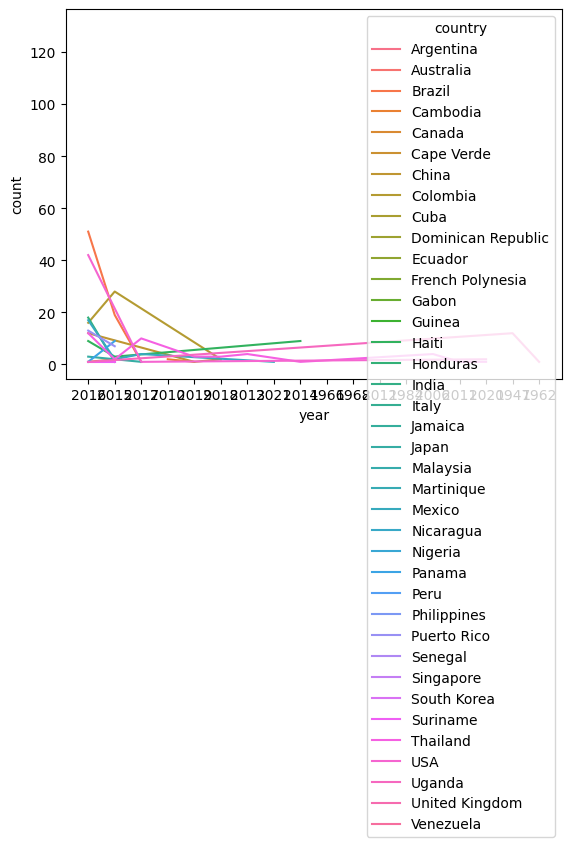

In [ ]:
sns.lineplot(data=allcount, x="year", y="count", hue="country")

This looks too crowded and does not provide much information. 

To be more easily to understand the data, we only put the 5 countires with the highest values obtained and plot them.

['Nicaragua' 'Brazil' 'USA' 'Colombia' 'Dominican Republic']
               country  year  count
2               Brazil  2015     19
13            Colombia  2015     28
3               Brazil  2016     51
14            Colombia  2016     16
17  Dominican Republic  2016     24
38           Nicaragua  2016    130
61                 USA  2016     42
4               Brazil  2017      1
62                 USA  2017      1
15            Colombia  2018      2
63                 USA  2020      2


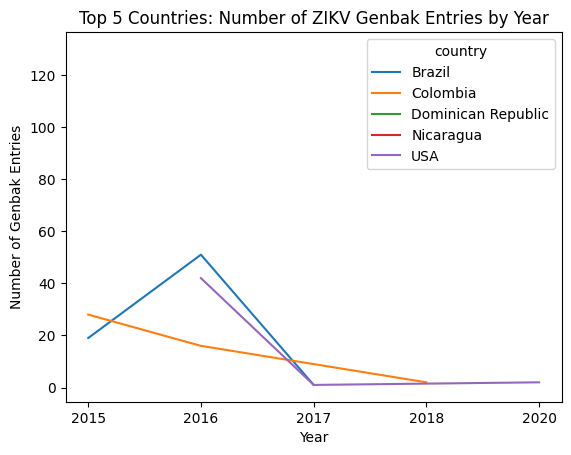

In [ ]:
# Sort the data by count in descending order
sorted_data = allcount.sort_values(by='count', ascending=False)

# Select the top 5 countries with highest values
top_countries = sorted_data['country'].unique()[:5]

print(top_countries)

# Filter the data for the top countries
filtered_data = allcount[allcount['country'].isin(top_countries)]

# sort by year
sorted_data = filtered_data.sort_values(by='year', ascending=True)
print(sorted_data)

sns.lineplot(data=filtered_data, x="year", y="count", hue="country")

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Genbak Entries')
plt.title('Top 5 Countries: Number of ZIKV Genbak Entries by Year')

# Display the plot
plt.show()

Some countries are not visualized by the line plot as there are only entries in genebank during one year.

Therefore, we transform the previous graph into a bargraph to show the number of entries per country and year separately.

['Nicaragua' 'Brazil' 'USA' 'Colombia' 'Dominican Republic']
               country  year  count
2               Brazil  2015     19
13            Colombia  2015     28
3               Brazil  2016     51
14            Colombia  2016     16
17  Dominican Republic  2016     24
38           Nicaragua  2016    130
61                 USA  2016     42
4               Brazil  2017      1
62                 USA  2017      1
15            Colombia  2018      2
63                 USA  2020      2


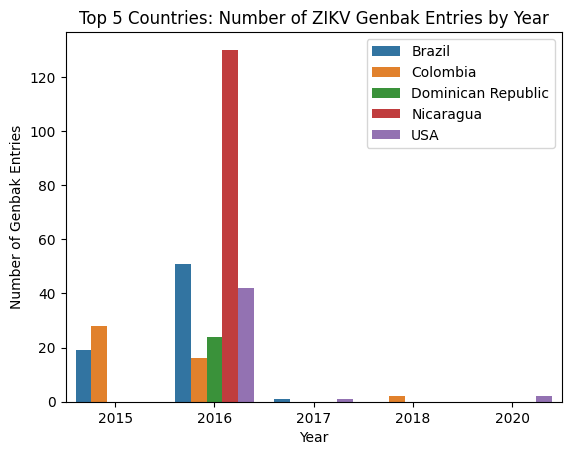

In [ ]:
# Sort the data by count in descending order
sorted_data = allcount.sort_values(by='count', ascending=False)

# Select the top 5 countries with highest values
top_countries = sorted_data['country'].unique()[:5]

print(top_countries)

# Filter the data for the top countries
filtered_data = allcount[allcount['country'].isin(top_countries)]

# sort by year
sorted_data = filtered_data.sort_values(by='year', ascending=True)
print(sorted_data)

sns.barplot(data=filtered_data, x="year", y="count", hue="country")

# Set the labels, title and legend
plt.xlabel('Year')
plt.ylabel('Number of Genbak Entries')
plt.title('Top 5 Countries: Number of ZIKV Genbak Entries by Year')
plt.legend(loc='upper right')

# Display the plot
plt.show()

#Conclusion

The previous graphs, tables and lines of code that we have shown represent the power of Python applied in biomedicine. With a single line of code, we can retrieve large data sets and convert them into a manageable data frame containing all the information we want, without even opening the files. This saves computing power to process powerful datasets or more complex functions that we might use in the near future. 



#Future approaches

For future work our ideas pass to construct a heat map of the number of reported entries for ZIKV timelapsed thoughout the years;

For that we need to construct a dataframe with all the geographic coordenates (e.g. from a shapefile) of the countries and match it with our dataframe;

Furthermore the global distribution of ZIKV could be compared to the distribution of its main vector species *Aedes aegypti* and *Aedes albopictus* to assess the potential expansion range of the virus;

